In [46]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
sys.path.append('..')
import django
django.setup()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')
import tools

In [2]:
## Sectionate by coordinates
##minx = -85
##maxx = -80
##miny = 30
##maxy = 35


### PATH information for running in the Biospytial container
#plotdata_path = "/RawDataCSV/idiv_share/plotsClimateData_11092017.csv"
#empirical_data_path = "/apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv"


In [47]:
run ../HEC_runs/fit_fia_logbiomass_logspp_GLS.py /RawDataCSV/idiv_share/plotsClimateData_11092017.csv /apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv -85 -80 30 35

/opt/conda/envs/biospytial/lib/python2.7/site-packages/IPython/utils/py3compat.py:289: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  builtin_mod.execfile(filename, *where)
INFO:__main__:Reprojecting to Alberts equal area
INFO:__main__:Removing possible duplicates. 
 This avoids problems of Non Positive semidefinite
INFO:__main__:Fitting OLS linear model: logBiomass ~ logSppN 
INFO:__main__:Reading the empirical Variogram file
INFO:__main__:Instantiating a Variogram object with the values calculated before
INFO:__main__:Dropping possible Nans
INFO:__main__:Instantiating Matern Model...
INFO:__main__:fitting Whittle Model with the empirical variogram
INFO:__main__:Model fitted
INFO:__main__:Subselecting Region
INFO:__main__:Calculating Distance Matrix
INFO:__main__:Fitting linear model using GLS
INFO:__main__:Writing to file
INFO:__main__:Finished! Results in: tests1.csv


# From here downwards it's the forensic analysis.

In [48]:
from HEC_runs.fit_fia_logbiomass_logspp_GLS import prepareDataFrame, createMaternVariogram, buildSpatialStructure, calculateGLS

In [49]:
new_data = prepareDataFrame("/RawDataCSV/idiv_share/plotsClimateData_11092017.csv")

INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Reprojecting to Alberts equal area
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Removing possible duplicates. 
 This avoids problems of Non Positive semidefinite


In [50]:
gvg,tt = createVariogram("/apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv",new_data)

INFO:__main__:Reading the empirical Variogram file
INFO:__main__:Instantiating a Variogram object with the values calculated before
INFO:__main__:Dropping possible Nans
INFO:__main__:Instantiating Matern Model...
INFO:__main__:fitting Whittle Model with the empirical variogram
INFO:__main__:Model fitted


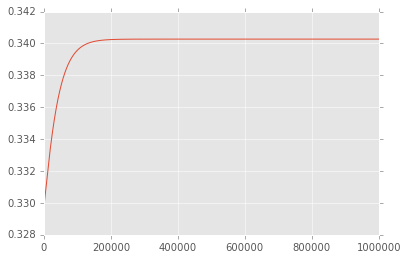

In [51]:
import numpy as np
xx = np.linspace(0,1000000,1000)
plt.plot(xx,gvg.model.f(xx))

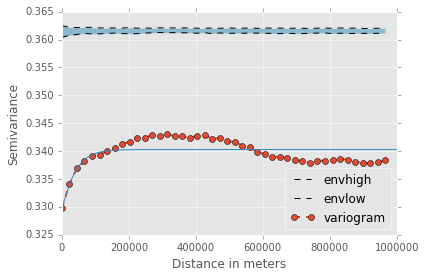

In [52]:
gvg.plot(refresh=False)
plt.plot(xx,gvg.model.f(xx))

In [53]:
type(gvg.model)

tools.WhittleVariogram

In [9]:
matern_model = tools.MaternVariogram(sill=0.34,range_a=100000,nugget=0.0,kappa=0.5)
whittle_model = tools.WhittleVariogram(sill=0.34,range_a=100000,nugget=0.0,alpha=3)

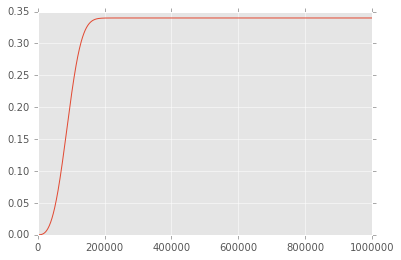

In [10]:
plt.plot(xx,whittle_model.f(xx))

In [11]:
gvg.model = whittle_model


In [12]:
gvg.fitVariogramModel(whittle_model)

../tools.py:549: RuntimeWarning: divide by zero encountered in power
  g_h = ((sill - nugget)*(1 - np.exp(-(h**alpha / range_a**alpha)))) + nugget*Ih


< Whittle Variogram : sill 0.340274656891, range 41061.6971399, nugget 0.329817414704, alpha1.12113685018 >

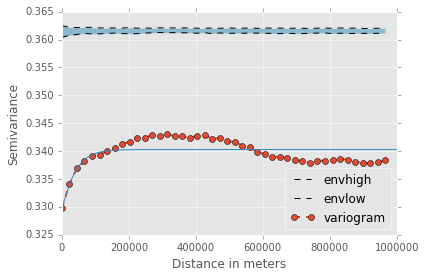

In [13]:
gvg.plot(refresh=False)
plt.plot(xx,gvg.model.f(xx))

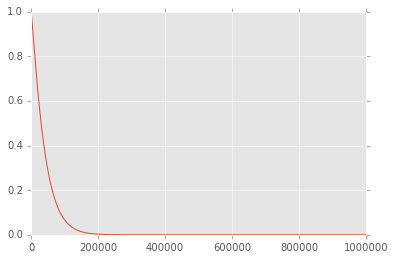

In [14]:
plt.plot(xx,gvg.model.corr_f(xx))

In [15]:
expm = tools.ExponentialVariogram(sill=0.34,range_a=100000,nugget=0.2)

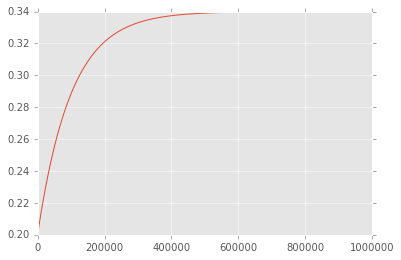

In [16]:
plt.plot(xx,expm.f(xx))
y = expm.f(xx)

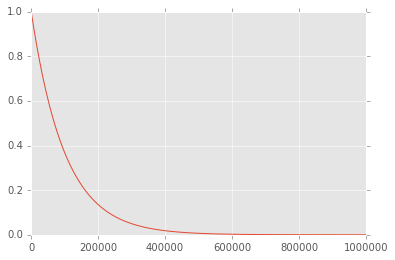

In [17]:
plt.plot(xx,(expm.corr_f(xx)))

In [54]:
def randomSelection(n,p):
    idxs = np.random.choice(n,p,replace=False)
    random_sample = new_data.iloc[idxs]
    return random_sample
#################
n = len(new_data)
p = 3000 # The amount of samples taken (let's do it without replacement)

In [31]:
random_sample = randomSelection(n,100)

In [32]:
random_sample.shape

(100, 46)

In [33]:
secvg = tools.Variogram(random_sample,'logBiomass',model=whittle_model)

In [34]:
Mdist = secvg.distance_coordinates

In [35]:
Mdist.shape

(100, 100)

In [37]:
cc = gvg.model.calculateCovarianceMatrixWith(Mdist)

In [40]:
cc.shape

(100, 100)

In [41]:
np.linalg.cholesky(cc)

array([[  5.83330658e-01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.83330658e-01,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   5.83330658e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          5.83297874e-01,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   7.22159481e-04, ...,
         -9.68531415e-19,   5.83328858e-01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.82444674e-49,   5.89703577e-36,   5.83330653e-01]])

In [43]:
cc.diagonal()

array([ 0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34027466,
        0.34027466,  0.34027466,  0.34027466,  0.34027466,  0.34

In [45]:
calculateGLS(random_sample,cc)

INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Fitting linear model using GLS


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc17f62e150>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             GLS Regression Results                            
 Dep. Variable:             logBiomass   R-squared:                       0.148
 Model:                            GLS   Adj. R-squared:                  0.139
 Method:                 Least Squares   F-statistic:                     17.01
 Date:                Tue, 16 Jan 2018   Prob (F-statistic):           7.80e-05
 Time:                        16:05:49   Log-Likelihood:                -87.947
 No. Observations:                 100   AIC:                             179.9
 Df Residuals:                      98   BIC:                             185.1
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0%